# Data Wrangling Project: - Politics and Guns

## 1. Gather data

### **1.1.** Problem Statement

I will be looking at both gun related deaths and voting data for U.S counties. From this I hope to determine whether there is a correlation between gun related deaths and the dominant political party of the county. Also, if the vote for any particular candidate within a political party sees a change in gun related deaths.

### **1.2.** Gather at least two datasets using two different data gathering methods


#### **Dataset 1**

Type: TSV file

Method: The data was gathered by importing via pandas directly from the web address.

Dataset variables:

* Year
* County
* State Code
* County Code
* Deaths
* Population
* Crude Rate
* Crude Rate Lower 95% Confidence Interval
* Crude Rate Upper 95% Confidence Interval
* Age Adjusted Rate
* Age Adjusted Rate Lower 95% Confidence Interval
* Age Adjusted Rate Upper 95% Confidence Interval

In [1]:
# Import all relevant modules.

import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Import TSV file using pandas.

df_1_raw = pd.read_csv('https://query.data.world/s/nh2zhsd7o3pjdk3czck2t7nkdbxnuc?dws=00000', sep = '\t')

# Save a working version of the raw data for cleaning

df_1 = df_1_raw.copy()

#### Dataset 2

Type: CSV File

Method: The data was gathered using a get request on the site url.

Dataset variables:

* year
* state
* state_po
* county
* FIPS
* office
* candidate
* party
* candidatevotes
* total votes
* version

In [3]:
# Open the CSV file via a get request.

url = 'https://query.data.world/s/rtrs43rfgzjoksiod4ahzgbdl2qrw4?dws=00000'
info = requests.get(url)
info.raise_for_status()
open('countypres_2000-2016.csv', 'wb').write(info.content)
df_2_raw = pd.read_csv('countypres_2000-2016.csv')

# Save a working version of the raw data for cleaning

df_2 = df_2_raw.copy()

## 2. Assess data


### 2.1 Quality Issues:
1.  The FIPS and County Code are of different datatypes despite showing the same information.
2.  Both the 'Crude Rate' and 'Age Adjusted Rate' in df_1 have less than half non-null values.
3.  Datatypes could be changed to reduce file sizes and ease visualisation eg. 'year' in df_2 has only 5 unique values and thus could be changed to catagorical.
4.  A large proportion of the 'party' column in df_1 is null, for which the corresponding 'candidate' is entered as 'other' making these rows redundant for the questions posed by this report.

In [4]:
# Using the .head() method the data can be visually inspected. 
# The visual inspection suggests we should look closer into quality issues: 1, 2, and 4.

df_1.head(10)

,Year,County,State Code,County Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,1999,"Baldwin County, AL",1,1003,22,137555,15.99,10.02,24.21,16.28,10.20,24.64
1,1999,"Calhoun County, AL",1,1015,29,114910,25.24,16.90,36.24,25.21,16.89,36.21
2,1999,"Chambers County, AL",1,1017,10,36527,NaN,13.13,50.35,NaN,12.91,49.51
3,1999,"Colbert County, AL",1,1033,14,54715,NaN,13.99,42.93,NaN,13.54,41.57
4,1999,"Dallas County, AL",1,1047,11,46722,NaN,11.75,42.13,NaN,12.15,43.54
5,1999,"DeKalb County, AL",1,1049,15,63593,NaN,13.20,38.90,NaN,12.86,37.90
6,1999,"Etowah County, AL",1,1055,23,104002,22.11,14.02,33.18,21.24,13.46,31.87
7,1999,"Jackson County, AL",1,1071,10,53433,NaN,8.97,34.42,NaN,8.75,33.55
8,1999,"Jefferson County, AL",1,1073,149,662845,22.48,18.87,26.09,22.18,18.62,25.75
9,1999,"Lauderdale County, AL",1,1077,13,87590,NaN,7.90,25.38,NaN,7.19,23.08


In [5]:
df_2.head(10)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203
5,2000,Alabama,AL,Baldwin,1003.0,President,George W. Bush,republican,40872.0,56480,20191203
6,2000,Alabama,AL,Baldwin,1003.0,President,Ralph Nader,green,1033.0,56480,20191203
7,2000,Alabama,AL,Baldwin,1003.0,President,Other,NaN,578.0,56480,20191203
8,2000,Alabama,AL,Barbour,1005.0,President,Al Gore,democrat,5188.0,10395,20191203
9,2000,Alabama,AL,Barbour,1005.0,President,George W. Bush,republican,5096.0,10395,20191203


In [6]:
# Using the .info() method we see that FIPS is a float and County Code is an int.

df_1['County Code'].info()
df_2['FIPS'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 14379 entries, 0 to 14378
Series name: County Code
Non-Null Count  Dtype
--------------  -----
14379 non-null  int64
dtypes: int64(1)
memory usage: 112.5 KB
<class 'pandas.core.series.Series'>
RangeIndex: 50524 entries, 0 to 50523
Series name: FIPS
Non-Null Count  Dtype  
--------------  -----  
50476 non-null  float64
dtypes: float64(1)
memory usage: 394.8 KB


In [7]:
# Using the .info() method we see that 'Crude Rate' and 'Age Adjusted Rate' have less than half non-null values.

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14379 entries, 0 to 14378
Data columns (total 12 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Year                                             14379 non-null  int64  
 1   County                                           14379 non-null  object 
 2   State Code                                       14379 non-null  int64  
 3   County Code                                      14379 non-null  int64  
 4   Deaths                                           14379 non-null  int64  
 5   Population                                       14379 non-null  int64  
 6   Crude Rate                                       6892 non-null   float64
 7   Crude Rate Lower 95% Confidence Interval         14379 non-null  float64
 8   Crude Rate Upper 95% Confidence Interval         14379 non-null  float64
 9   Age Adjusted Rate           

In [8]:
# Using the .info() and .nunique methods we see that several columns 
# are using inefficient data types given their number of unique values.
# We also see that a large proportion of the 'party' column is null and can infer that so too is the 'candidate' column.

df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50524 entries, 0 to 50523
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            50524 non-null  int64  
 1   state           50524 non-null  object 
 2   state_po        50460 non-null  object 
 3   county          50524 non-null  object 
 4   FIPS            50476 non-null  float64
 5   office          50524 non-null  object 
 6   candidate       50524 non-null  object 
 7   party           34735 non-null  object 
 8   candidatevotes  50120 non-null  float64
 9   totalvotes      50524 non-null  int64  
 10  version         50524 non-null  int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 4.2+ MB


In [9]:
df_1.nunique()

Year                                                  21
County                                              1265
State Code                                            51
County Code                                         1265
Deaths                                               392
Population                                         14141
Crude Rate                                          2290
Crude Rate Lower 95% Confidence Interval            2154
Crude Rate Upper 95% Confidence Interval            4442
Age Adjusted Rate                                   2276
Age Adjusted Rate Lower 95% Confidence Interval     2103
Age Adjusted Rate Upper 95% Confidence Interval     4443
dtype: int64

In [10]:
df_2.nunique()

year                  5
state                51
state_po             51
county             1854
FIPS               3155
office                1
candidate            10
party                 3
candidatevotes    17287
totalvotes        12759
version               1
dtype: int64

### 2.2 Tidiness Issues:
1. The County column of df_1 contains two variables, County and the state abbreviation, or 'state_po' as it appears in df_2.
2. Several columns that display the same data in each have different names. Also df_1 uses upper, lowercase, and space characters whereas df_2 only uses lower cases (with the exception of 'FIPS') and uses underscores instead of spaces.
3. The 'version' and 'office' columns in df_2 are redundant.
4. For each county in df_2 there are four candidates with associated parties and vote counts

In [11]:
# Again using the .head() method to visually inspect the data we see that the 'County' column contains two variables,
# and that the datasets have several columns in common but under differently formatted labels.

df_1.head()

,Year,County,State Code,County Code,Deaths,Population,Crude Rate,Crude Rate Lower 95% Confidence Interval,Crude Rate Upper 95% Confidence Interval,Age Adjusted Rate,Age Adjusted Rate Lower 95% Confidence Interval,Age Adjusted Rate Upper 95% Confidence Interval
0,1999,"Baldwin County, AL",1,1003,22,137555,15.99,10.02,24.21,16.28,10.20,24.64
1,1999,"Calhoun County, AL",1,1015,29,114910,25.24,16.90,36.24,25.21,16.89,36.21
2,1999,"Chambers County, AL",1,1017,10,36527,NaN,13.13,50.35,NaN,12.91,49.51
3,1999,"Colbert County, AL",1,1033,14,54715,NaN,13.99,42.93,NaN,13.54,41.57
4,1999,"Dallas County, AL",1,1047,11,46722,NaN,11.75,42.13,NaN,12.15,43.54


In [12]:
# Here we see how each county has four entries for candidate, party, votes etc.

df_2.head(8)

,year,state,state_po,county,FIPS,office,candidate,party,candidatevotes,totalvotes,version
0,2000,Alabama,AL,Autauga,1001.0,President,Al Gore,democrat,4942.0,17208,20191203
1,2000,Alabama,AL,Autauga,1001.0,President,George W. Bush,republican,11993.0,17208,20191203
2,2000,Alabama,AL,Autauga,1001.0,President,Ralph Nader,green,160.0,17208,20191203
3,2000,Alabama,AL,Autauga,1001.0,President,Other,NaN,113.0,17208,20191203
4,2000,Alabama,AL,Baldwin,1003.0,President,Al Gore,democrat,13997.0,56480,20191203
5,2000,Alabama,AL,Baldwin,1003.0,President,George W. Bush,republican,40872.0,56480,20191203
6,2000,Alabama,AL,Baldwin,1003.0,President,Ralph Nader,green,1033.0,56480,20191203
7,2000,Alabama,AL,Baldwin,1003.0,President,Other,NaN,578.0,56480,20191203


In [13]:
# Using the .nunique() method we see that df_2 has two completely redundant columns with only one unique value.
df_2.nunique()

year                  5
state                51
state_po             51
county             1854
FIPS               3155
office                1
candidate            10
party                 3
candidatevotes    17287
totalvotes        12759
version               1
dtype: int64

## 3. Clean data


I will take the following steps in order to clean the data:

Tidiness Issues:

1. Drop irrelevent columns (Adressing Tidiness Issues \#1 \#3)
2. Rename remaining columns (Adressing Tidiness Issue \#2)
3. Remove null values and remove rows from df_2 for non majority candidates (Addressing Tidiness Issue \#4 and Quality Issue \#4)

Quality Issues:

4. Replace null values (Adressing Quality Issues \#2)
5. Change datatypes (Adressing Quality Issue \#1 \#3)
6. Merge the two data sets using the county code as a key


#### 3.1 Drop irrelevent columns (Adressing Tidiness Issues \#1 \#3)

In [14]:
# For df_1 I have chosen to drop all columns after 'Crude Rate' as they will not be used for the analysis,
# I am also dropping the 'State Code' and 'County' columns as the state name and county are repeated in df_2

df_1.drop(['Crude Rate Lower 95% Confidence Interval','Crude Rate Upper 95% Confidence Interval',
           'Age Adjusted Rate', 'Age Adjusted Rate Lower 95% Confidence Interval',
           'Age Adjusted Rate Upper 95% Confidence Interval',
          'State Code', 'County'], axis = 1, inplace = True)

In [15]:
df_1.head(1)

,Year,County Code,Deaths,Population,Crude Rate
0,1999,1003,22,137555,15.99


In [16]:
# For df_2 I am dropping the two redundant columns (office and version) 
# as well as two columns that won't be used for tha analysis (totalvotes and state_po)

df_2.drop(['version', 'office', 'totalvotes', 'state_po'], axis = 1, inplace = True)

In [17]:
df_2.head(1)

,year,state,county,FIPS,candidate,party,candidatevotes
0,2000,Alabama,Autauga,1001.0,Al Gore,democrat,4942.0


#### 3.2 Rename remaining columns (Adressing Tidiness Issue \#2)

In [18]:
df_1.rename({'Year': 'year', 'County Code': 'county_code', 
             'Deaths': 'deaths', 'Population': 'population', 
             'Crude Rate': 'crude_rate'}, axis = 1, inplace = True)

In [19]:
df_1.head(1)

,year,county_code,deaths,population,crude_rate
0,1999,1003,22,137555,15.99


In [20]:
df_2.rename({'year': 'year', 'FIPS': 'county_code', 
             'candidatevotes': 'votes'}, axis = 1, inplace = True)

In [21]:
df_2.head(1)

,year,state,county,county_code,candidate,party,votes
0,2000,Alabama,Autauga,1001.0,Al Gore,democrat,4942.0


#### 3.3 Remove null values and remove rows from df_2 for non majority candidates (Addressing Tidiness Issue \#4 and Quality Issue \#4)

In [22]:
# For df_2 I will be removing all rows with missing values.
# A very small proportion of rows are missing values for county_code and votes.
# A large proportion of values for party are missing however these rows would be removed 
# when finding the majority vote per county anyway.

df_2 = df_2.dropna()

In [23]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 34417 entries, 0 to 50522
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         34417 non-null  int64  
 1   state        34417 non-null  object 
 2   county       34417 non-null  object 
 3   county_code  34417 non-null  float64
 4   candidate    34417 non-null  object 
 5   party        34417 non-null  object 
 6   votes        34417 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 2.1+ MB


In [24]:
# Here I am finding rows where the year and county are duplicated, 
# sorting them according to the number of votes, and dropping all but the row with the most votes

subset = ['year', 'county_code']
df_2 = df_2.sort_values(subset + ['votes'], ascending = False).drop_duplicates(subset)

# The .tail() (the order being reversed in the process) can be compared to the result of the .head() method
# used previously to show that all but the majority candidates have been dropped from the data set
df_2.tail()

,year,state,county,county_code,candidate,party,votes
17,2000,Alabama,Blount,1009.0,George W. Bush,republican,12667.0
13,2000,Alabama,Bibb,1007.0,George W. Bush,republican,4273.0
8,2000,Alabama,Barbour,1005.0,Al Gore,democrat,5188.0
5,2000,Alabama,Baldwin,1003.0,George W. Bush,republican,40872.0
1,2000,Alabama,Autauga,1001.0,George W. Bush,republican,11993.0


In [25]:
# The votes column having served it's purpose may now also be dropped

df_2.drop('votes', axis = 1, inplace = True)

#### 3.4. Replace null values (Adressing Quality Issues \#2)

In [26]:
# I am replacing all missing values of crude_rate with a calculated value.
# The crude_rate in df_1 is calculated by dividing the number of deaths by the population
# and then multiplying by 10^5.

df_1.crude_rate = df_1.crude_rate.fillna((df_1.deaths / df_1.population) * (10**5))

In [27]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14379 entries, 0 to 14378
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   year         14379 non-null  int64  
 1   county_code  14379 non-null  int64  
 2   deaths       14379 non-null  int64  
 3   population   14379 non-null  int64  
 4   crude_rate   14379 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 561.8 KB


#### 3.5 Change datatypes (Adressing Quality Issue \#1 \#3)

In [28]:
# In df_1 only the year_1 is of an innefficient data type 
# as it has few unique values it can be changed to a 'category'

# First I'm defining a function to use for both sets

def newType(frame, label, data):
    frame[label] = frame[label].astype(data)

newType(df_1, 'year', 'category')

# This has reduced the file size by roughly 17%

df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14379 entries, 0 to 14378
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         14379 non-null  category
 1   county_code  14379 non-null  int64   
 2   deaths       14379 non-null  int64   
 3   population   14379 non-null  int64   
 4   crude_rate   14379 non-null  float64 
dtypes: category(1), float64(1), int64(3)
memory usage: 464.2 KB


In [29]:
# The following variables have few enough unique values to be converted from object to category to save space:
# year_2, state, candidate, party

labels = ['year', 'state', 'candidate', 'party']

for i in labels:
    newType(df_2, i, 'category')
    
# county_code needs to be changed to an integer value to fascillitate the merge with df_1

newType(df_2, 'county_code', int)

# This has reduced the file size by roughly 50%
    
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15768 entries, 49857 to 1
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   year         15768 non-null  category
 1   state        15768 non-null  category
 2   county       15768 non-null  object  
 3   county_code  15768 non-null  int64   
 4   candidate    15768 non-null  category
 5   party        15768 non-null  category
dtypes: category(4), int64(1), object(1)
memory usage: 434.3+ KB


#### 3.6 Merge the two data sets using the county_code and year as a key

In [30]:
dfm = pd.merge(df_1, df_2, on = ['year', 'county_code'])

In [31]:
dfm.head()

,year,county_code,deaths,population,crude_rate,state,county,candidate,party
0,2000,1003,16,140415,11.394794,Alabama,Baldwin,George W. Bush,republican
1,2000,1015,23,112249,20.490000,Alabama,Calhoun,George W. Bush,republican
2,2000,1021,10,39593,25.256990,Alabama,Chilton,George W. Bush,republican
3,2000,1033,12,54984,21.824531,Alabama,Colbert,Al Gore,democrat
4,2000,1045,10,49129,20.354577,Alabama,Dale,George W. Bush,republican


## 4. Update data store

In [32]:
# Raw data for gun related deaths
df_1_raw.to_csv('gun_related_deaths.csv', index = False, encoding = 'utf-8')

# Raw data for presidential vote
df_2_raw.to_csv('presidential_vote.csv', index = False, encoding = 'utf-8')

# Cleaned data for gun related deaths
df_1.to_csv('gun_related_deaths_clean.csv', index = False, encoding = 'utf-8')

# Cleaned data for presidential vote
df_2.to_csv('presidential_vote_clean.csv', index = False, encoding = 'utf-8')

# Cleaned and combined data set
dfm.to_csv('grd_and_pv_clean.csv', index = False, encoding = 'utf-8')

## 5. Answer the research question

 1. Is there a correlation between gun related deaths and the dominant political party of the county?
 2. Does the vote for any particular candidate within a political party see a change in gun related deaths?


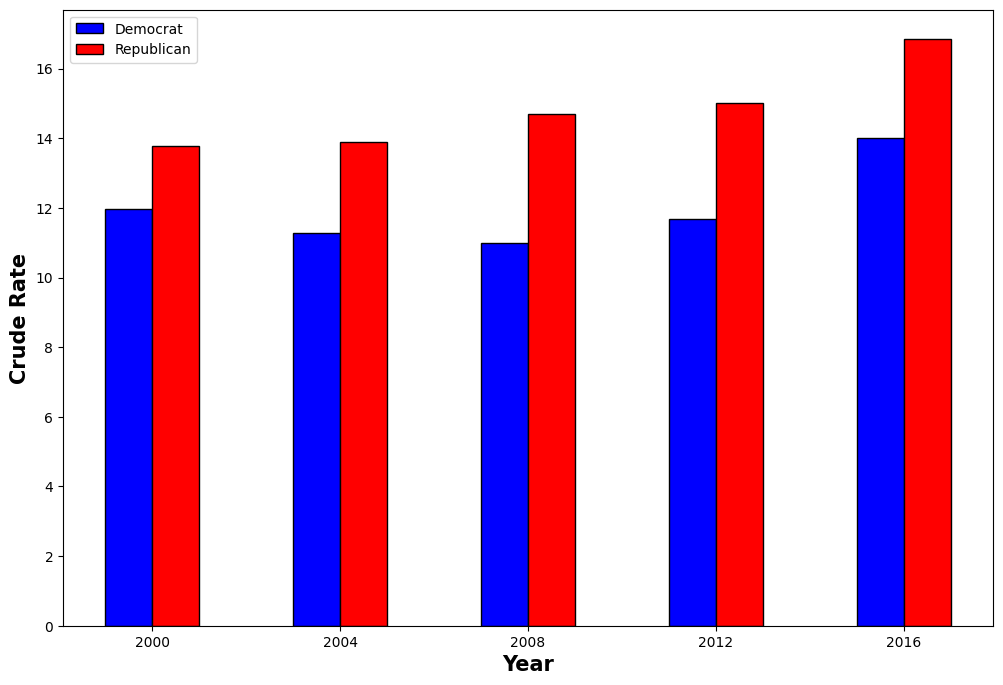

In [33]:
# First I am grouping the data by the party and year variables
df_grouped = dfm.groupby(['party', 'year']).mean(numeric_only = True)

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
dem = df_grouped.iloc[:5].crude_rate 
rep = df_grouped.iloc[5:].crude_rate 

 
# Set position of bar on X axis 
br1 = np.arange(len(dem)) 
br2 = [x + barWidth for x in br1] 
 
# Make the plot
plt.bar(br1, dem, color ='b', width = barWidth, 
        edgecolor ='black', label ='Democrat') 
plt.bar(br2, rep, color ='r', width = barWidth, 
        edgecolor ='black', label ='Republican') 
 
# Adding Xticks 
plt.xlabel('Year', fontweight ='bold', fontsize = 15) 
plt.ylabel('Crude Rate', fontweight ='bold', fontsize = 15) 
plt.xticks([r + 0.125 for r in range(len(dem))], 
        ['2000', '2004', '2008', '2012', '2016'])
 
plt.legend()
plt.show()

We see from bar plot above that the gun related deaths per capita is higher on average in majority Republican counties. We also see that it has risen steadily between 2000 and 2016.

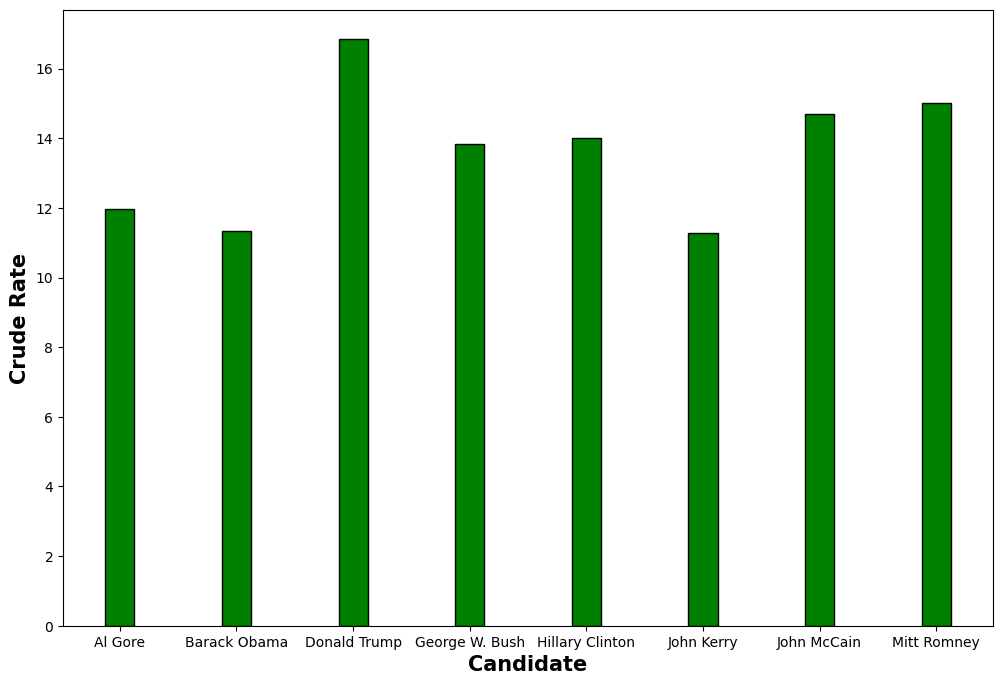

In [34]:
# Now I am grouping the data by candidate
df_grouped = dfm.groupby(['candidate']).mean(numeric_only = True).dropna()

# set width of bar 
barWidth = 0.25
fig = plt.subplots(figsize =(12, 8)) 
 
# set height of bar 
rate = df_grouped.crude_rate 

# Set position of bar on X axis 
br1 = np.arange(len(rate))  
 
# Make the plot
plt.bar(br1, rate, color ='g', width = barWidth, 
        edgecolor ='black') 
 
# Adding Xticks 
plt.xlabel('Candidate', fontweight ='bold', fontsize = 15) 
plt.ylabel('Crude Rate', fontweight ='bold', fontsize = 15) 
candlist = (list(dfm.candidate.unique()))
candlist.sort()
plt.xticks([r for r in range(len(rate))], 
        candlist)

plt.show()

The plot shows that the year of Donald Trump's election saw the highest rate of gun related deaths in his majority states, and that John Kerry saw the lowest rate.

### **5.2:** Reflection
On reflection I think a fairer way to look at the data, particularly for each candidate would be to find the overall rate of increase of gun related deaths across the country and scale to that. I would also like to combine the data for gun related deaths for the years in office of with elected year for each candidate to see if it is consistent or not.